In [1]:
!pip install -q -U transformers==4.37.2 bitsandbytes==0.41.3 accelerate==0.25.0 datasets torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [8]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 1.9 MB/s eta 0:00:00


In [3]:
import torch
from datasets import load_dataset
from peft import LoraConfig, get_peft_model
from PIL import Image
import torchvision.transforms as transforms
import os

import requests
from transformers import BlipProcessor, BlipForQuestionAnswering
from datasets import load_dataset
from torch.utils.data import DataLoader


In [15]:
import os

import requests
from transformers import BlipProcessor, BlipForQuestionAnswering
from datasets import load_dataset
import torch
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
import pickle

In [26]:
from datasets import load_dataset

dataset = load_dataset("Peppertuna/ChartQADatasetV2")


In [27]:
from sklearn.model_selection import train_test_split
train_dataset = dataset["train"].train_test_split(test_size=0.2, seed=42)["train"]
test_dataset = dataset["test"].train_test_split(test_size=0.2, seed=42)["test"]


In [29]:
test_dataset

Dataset({
    features: ['imgname', 'image', 'table', 'query', 'query_token', 'label'],
    num_rows: 250
})

In [28]:
train_dataset

Dataset({
    features: ['imgname', 'image', 'table', 'query', 'query_token', 'label'],
    num_rows: 16720
})

In [14]:
from transformers import BlipProcessor, BlipForQuestionAnswering

# Load the model
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip2-opt-2.7b")

# Extract the model's configuration
model_config = model.config

# Initialize the processor using the model's configuration
processor = BlipProcessor.from_pretrained("Salesforce/blip2-opt-2.7b", config=model_config)


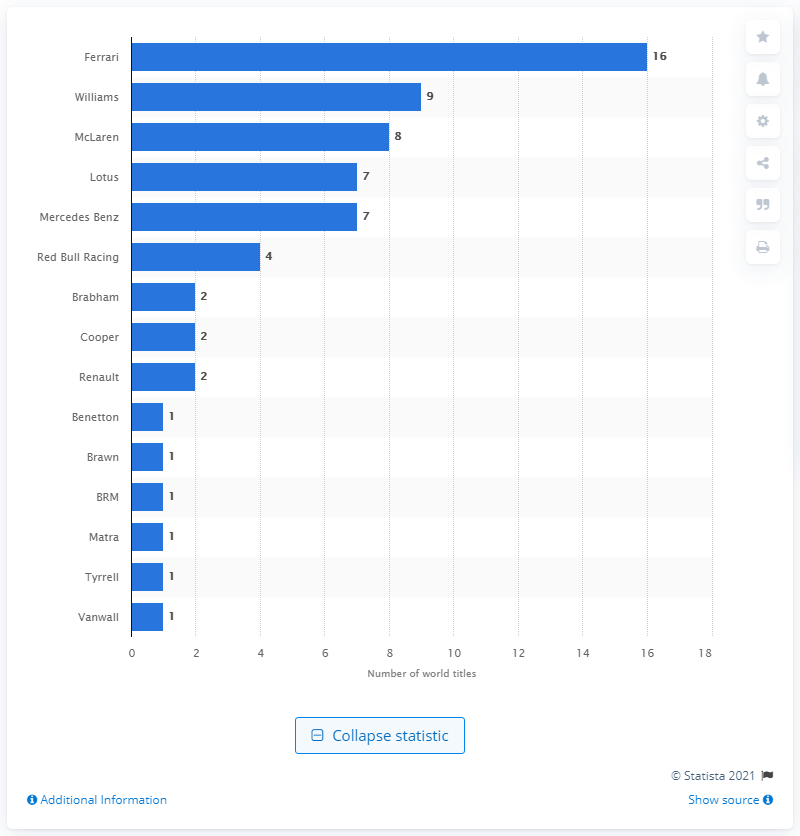

In [ ]:
dataset["train"][0]["image"]

In [ ]:
dataset["train"][0]["query"]

'As of 2021, how many championship titles had Ferrari won?'

In [ ]:
dataset["train"][0]["label"]

'16'

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['imgname', 'image', 'table', 'query', 'query_token', 'label'],
        num_rows: 20901
    })
    validation: Dataset({
        features: ['imgname', 'image', 'table', 'query', 'query_token', 'label'],
        num_rows: 960
    })
    test: Dataset({
        features: ['imgname', 'image', 'table', 'query', 'query_token', 'label'],
        num_rows: 1250
    })
})

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from torchvision import transforms


In [ ]:
from PIL import Image
import torch
from transformers import pipeline, MarianMTModel, MarianTokenizer
from IPython.display import display
from transformers import BitsAndBytesConfig

In [ ]:

# Assuming the image feature is named "image" in your dataset
image_path1 = dataset["train"][0]["image"]


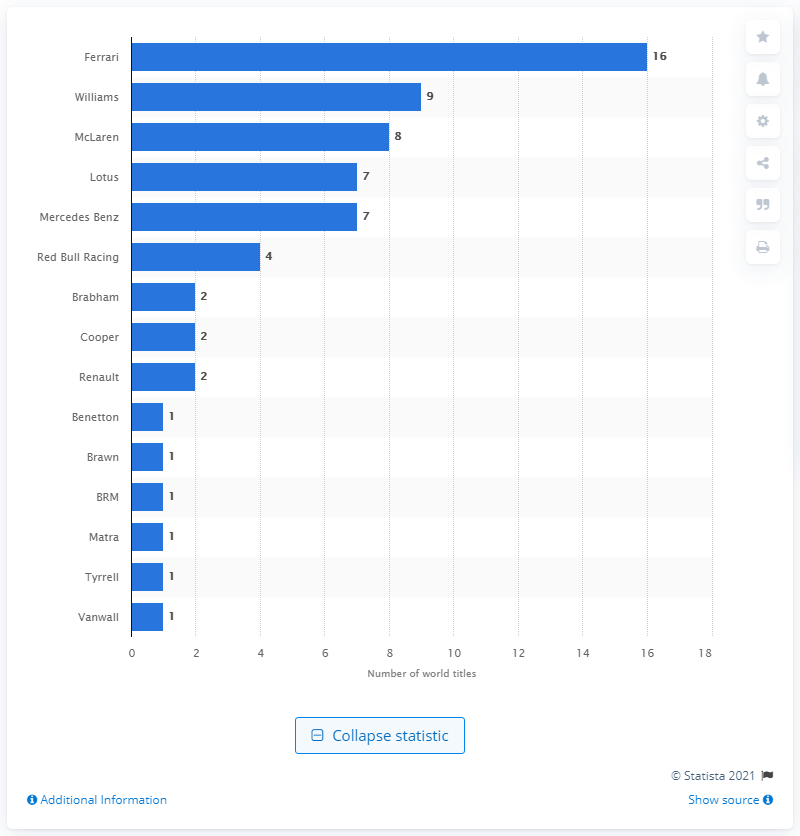

In [ ]:
image_path1

In [ ]:
max_new_tokens = 200
english_question = "As of 2021, how many championship titles had Ferrari won?"
prompt = f"USER: <image>\n{english_question}\nASSISTANT:"
outputs = pipe(image_path1, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


USER:  
As of 2021, how many championship titles had Ferrari won?
ASSISTANT: As of 2021, Ferrari has won a total of 16 Formula One World Championships.


In [ ]:
max_new_tokens = 100
english_question = "As of 2021, how many championship titles had Brawn won?"
prompt = f"USER: <image>{english_question}\nASSISTANT:"
outputs = pipe(image_path1, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


USER:  As of 2021, how many championship titles had Brawn won?
ASSISTANT: As of 2021, Brawn had won 1 championship title.


In [ ]:
max_new_tokens = 100
english_question = "As of 2021, how many championship titles had Ferrari won?"

prompt =  f"Question:<image>{english_question} \nAnswer:"

outputs = pipe(image_path1, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Question: As of 2021, how many championship titles had Ferrari won? 
Answer: 16


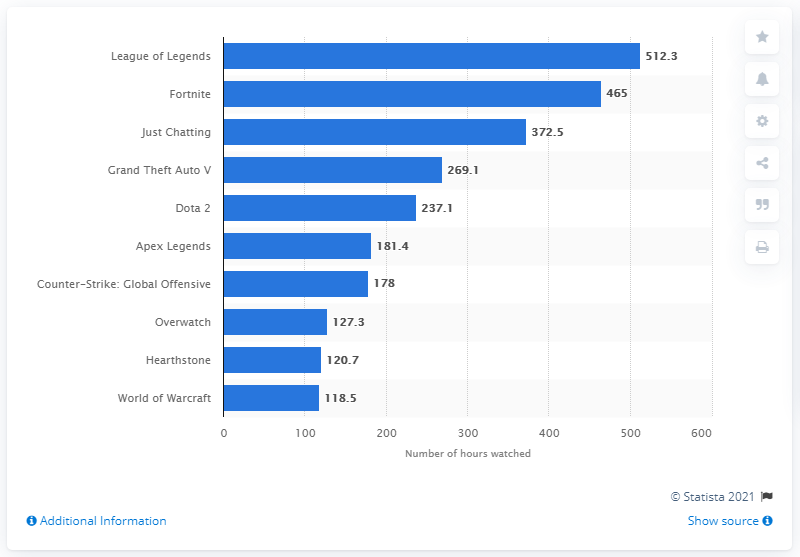

In [ ]:
dataset["train"][2]["image"]

In [ ]:
image_path2 = dataset["train"][1]["image"]

In [ ]:
 dataset["train"][1]["query"]

'What game topped the charts with 512.3 million hours watched on Twitch in the first half of 2019?'

In [ ]:
 dataset["train"][1]["label"]

'League of Legends'

In [ ]:
max_new_tokens = 100
english_question = "What game topped the charts with 178 million hours watched on Twitch in the first half of 2019?"

prompt =  f"Question:<image>{english_question} \nAnswer:"

outputs = pipe(image_path2, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])

Question: What game topped the charts with 178 million hours watched on Twitch in the first half of 2019? 
Answer: League of Legends


In [ ]:
image_path3 = dataset["train"][3]["image"]

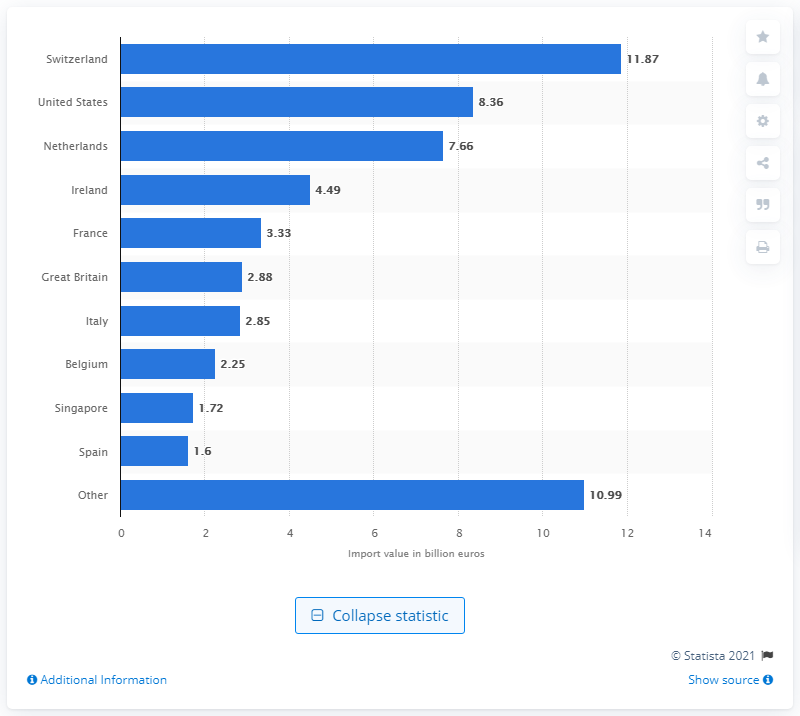

In [ ]:
dataset["train"][3]["image"]

In [ ]:
dataset["train"][3]["query"]

'Which country was the leading pharmaceutical supplier to Germany in 2019?'

In [ ]:
dataset["train"][3]["label"]

'Switzerland'

In [ ]:
max_new_tokens = 100
english_question = "Which country was the leading pharmaceutical supplier to Germany in 2019?"

prompt =  f"Question:<image>{english_question} \nAnswer:"

outputs = pipe(image_path3, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Question: Which country was the leading pharmaceutical supplier to Germany in 2019? 
Answer: Switzerland
